In [74]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

In [75]:
import matplotlib
from matplotlib import pyplot as plt

In [76]:
x1, y1 = -4, 0
x2, y2 = 4, 0
x3, y3 = 0, 7
centers = torch.FloatTensor([[x1, y1], [x2, y2], [x3, y3]])

cluster_size = 100
cluster_1 = torch.randn((cluster_size, 2)) + centers[0, :]
labels_1 = torch.zeros(cluster_size)
cluster_2 = torch.randn((cluster_size, 2)) + centers[1, :]
labels_2 = torch.ones(cluster_size)
cluster_3 = torch.randn((cluster_size, 2)) + centers[2, :]
labels_3 = torch.ones(cluster_size) * 2

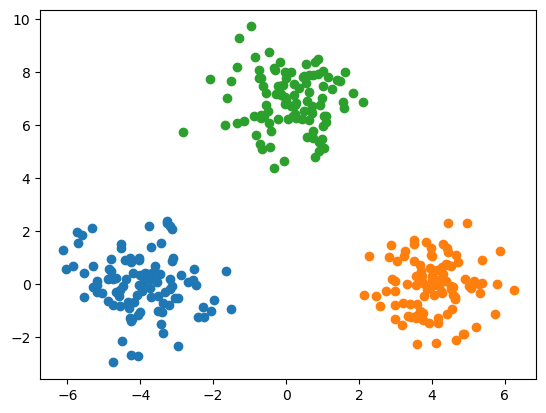

In [77]:
plt.scatter(cluster_1[:, 0], cluster_1[:, 1])
plt.scatter(cluster_2[:, 0], cluster_2[:, 1])
plt.scatter(cluster_3[:, 0], cluster_3[:, 1])

In [78]:
data = torch.cat((cluster_1, cluster_2, cluster_3), 0)
labels = torch.cat((labels_1, labels_2, labels_3), 0).long()
indices = torch.randperm(data.shape[0])
data = data[indices]
labels = labels[indices]

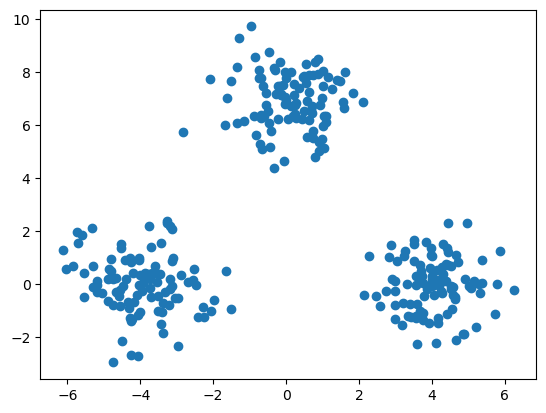

In [79]:
plt.scatter(data[:, 0], data[:, 1])

In [80]:
def visualize(W, b, data):
  predict = F.softmax(torch.matmul(data, W) + b, dim=1)
  predict = torch.argmax(predict, dim=1)
  plt.scatter(data[:, 0], data[:, 1], c=predict)

In [81]:
def train(n_classes: int,
          data: torch.Tensor,
          labels: torch.Tensor,
          num_epochs: int,
          learning_rate: float):
  n_features = data.shape[1]
  W = torch.randn((n_features, n_classes), requires_grad=True)
  b = torch.randn((1, n_classes), requires_grad=True)
  visualize(W, b, data)

  losses = [] # save the losses at every iteration and visualize it later
  optimizer = torch.optim.SGD([W, b], lr=learning_rate)
  # your code here
  for i in range(num_epochs):
    logits = torch.matmul(data, W) + b
    loss = F.cross_entropy(logits, labels)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  return W, b, losses

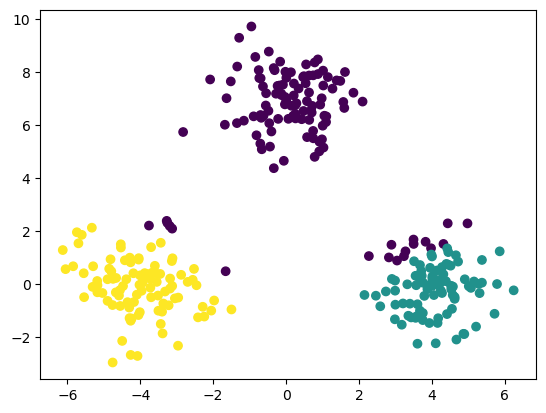

In [82]:
W, b, losses = train(n_classes=3,
                     data=data,
                     labels=labels,
                     num_epochs=1000,
                     learning_rate=0.1)

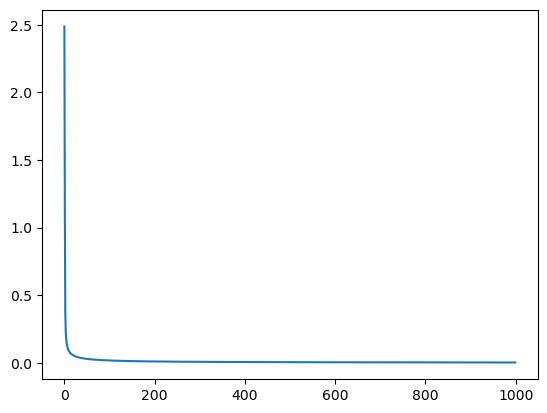

In [83]:
plt.plot(losses)

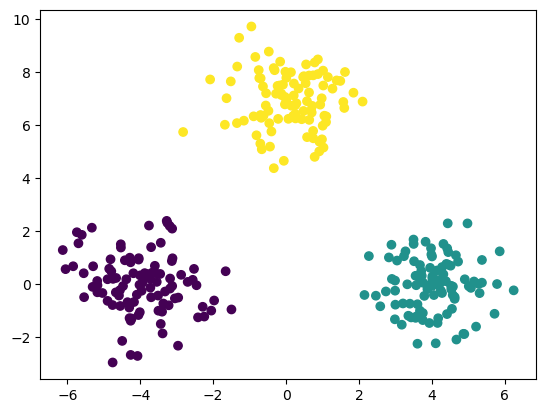

In [84]:
visualize(W, b, data)